In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import seaborn as sns

In [2]:
data = pd.read_csv('MonthWiseMarketArrivals_Clean.csv')

In [3]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [72]:
len(data)

10227

In [4]:
# Remove columns which are not required in predictions

cols = ['market','month','state','city','quantity','year','priceMin','priceMax']
data.drop(cols, axis = 1, inplace = True)
data.head()

,priceMod,date
0,446,January-2005
1,563,January-2006
2,1460,January-2010
3,3433,January-2011
4,605,January-2012


In [5]:
data = data.sort_values('date')

In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
data

,priceMod,date
5461,254,1996-04-01
5462,214,1997-04-01
7630,235,1998-04-01
1614,253,1998-04-01
7140,237,1998-04-01
...,...,...
9967,4190,2015-09-01
5799,4000,2015-09-01
825,3140,2015-09-01
4910,3336,2015-09-01


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10227 entries, 5461 to 2131
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   priceMod  10227 non-null  int64         
 1   date      10227 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 239.7 KB


In [9]:
#set 'Date' as index
data = data.set_index('date')
data.index

DatetimeIndex(['1996-04-01', '1997-04-01', '1998-04-01', '1998-04-01',
               '1998-04-01', '1998-04-01', '1998-04-01', '1998-04-01',
               '1998-04-01', '1998-04-01',
               ...
               '2015-09-01', '2015-09-01', '2015-09-01', '2015-09-01',
               '2015-09-01', '2015-09-01', '2015-09-01', '2015-09-01',
               '2015-09-01', '2015-09-01'],
              dtype='datetime64[ns]', name='date', length=10227, freq=None)

In [104]:
y = data['priceMod'].resample('MS').mean()
y['2001']

date
2001-01-01    478.100000
2001-02-01    333.500000
2001-03-01    303.500000
2001-04-01    247.600000
2001-05-01    216.700000
2001-06-01    284.900000
2001-07-01    333.700000
2001-08-01    498.300000
2001-09-01    465.363636
2001-10-01    511.272727
2001-11-01    699.363636
2001-12-01    403.307692
Freq: MS, Name: priceMod, dtype: float64

In [121]:
len(y)

242

In [11]:
#We are now going to apply - ADF [Augmented Diceky Fuller Method] 

# Objective-------to check if time series is stationary or not I.

from statsmodels.tsa.stattools import adfuller
dftest=adfuller(y, autolag='AIC')
(dftest)

# Here as per the below results, I could see the P value is .50 and test static is -1.55.
# Hence I cannot reject the NULL Hypothesis 
# Saying the TS is NON Stationary

(-1.5529565759212187,
 0.5071710159736885,
 13,
 228,
 {'1%': -3.4593607492757554,
  '5%': -2.8743015807562924,
  '10%': -2.5735714042782396},
 3117.0423350738133)

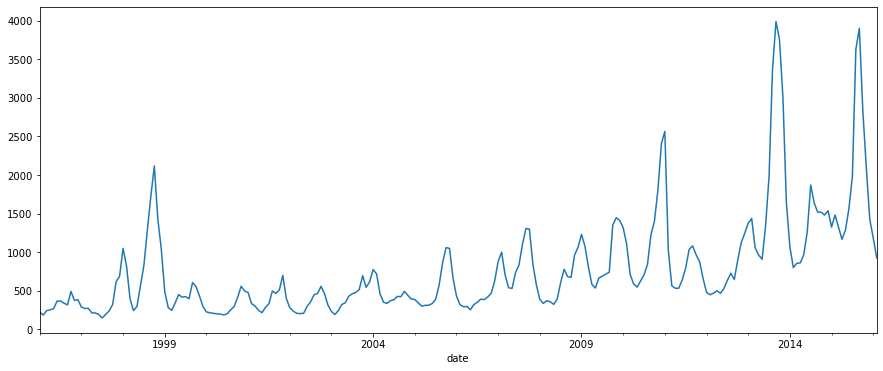

In [109]:
y.plot(figsize = (15, 6))
plt.show()

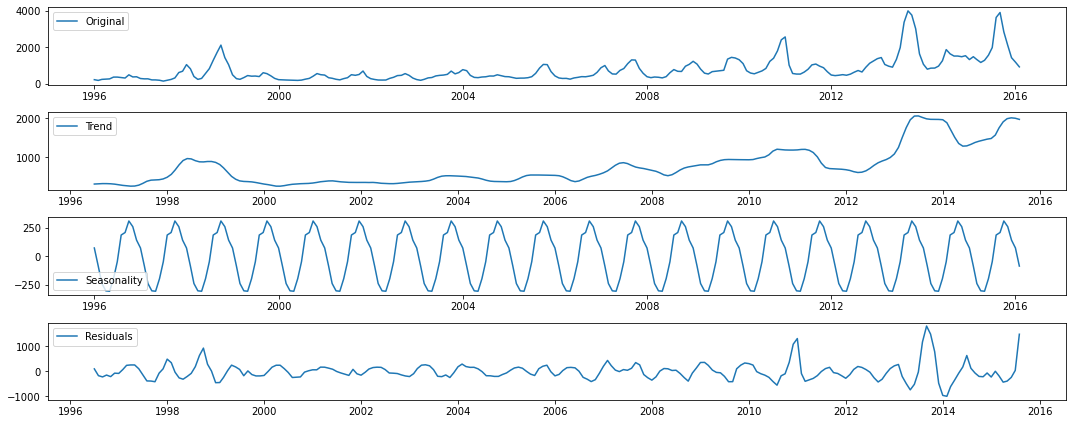

In [13]:
# Decomposition means - you are breaking the TS data into the each component:
#Trend | Seasonality | Irregularity
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

trend = decomposition.trend

seasonal = decomposition.seasonal

residual = decomposition.resid

plt.subplot(411)
plt.plot(y, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

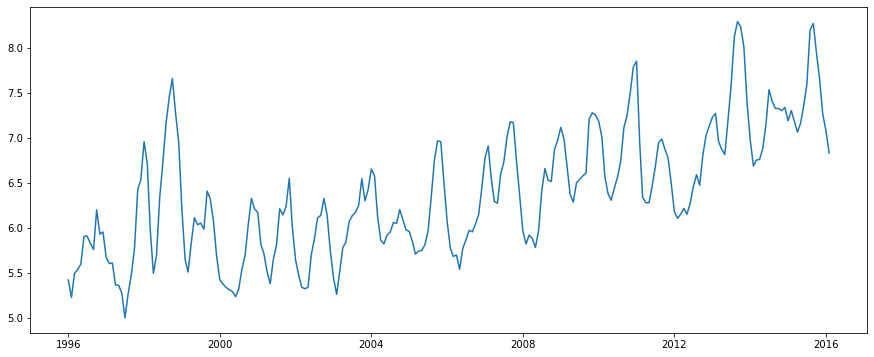

In [14]:
# Because you just have identified that your TS is Non STationary:
# Hence I will convert that to stationary

y_log = np.log(y)
plt.plot(y_log)
#plt.plot(y, color ='red')

In [15]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(y_log, autolag='AIC')
(dftest)


(-2.001270005320814,
 0.28601652388250465,
 6,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 -71.60691016465142)

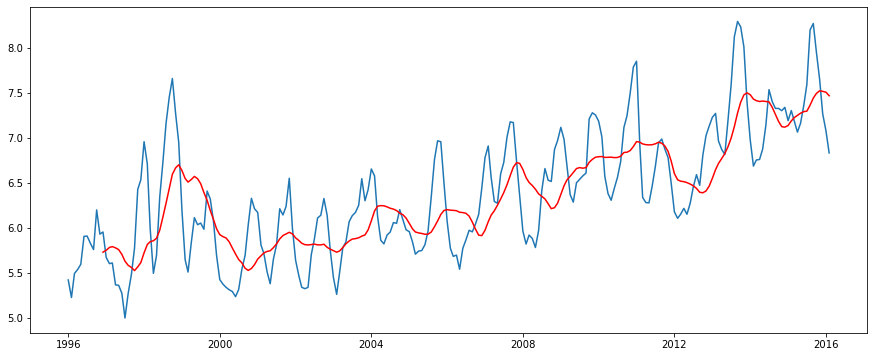

In [16]:
moving_avg = y_log.rolling(12).mean()
plt.plot(y_log)
plt.plot(moving_avg, color='red')

In [17]:
# Subtracting the MA from LOG value to make this TS stationary

y_log_moving_avg_diff = y_log - moving_avg
y_log_moving_avg_diff.head(12)

date
1996-01-01         NaN
1996-02-01         NaN
1996-03-01         NaN
1996-04-01         NaN
1996-05-01         NaN
1996-06-01         NaN
1996-07-01         NaN
1996-08-01         NaN
1996-09-01         NaN
1996-10-01         NaN
1996-11-01         NaN
1996-12-01    0.223744
Freq: MS, Name: priceMod, dtype: float64

<AxesSubplot:xlabel='date'>

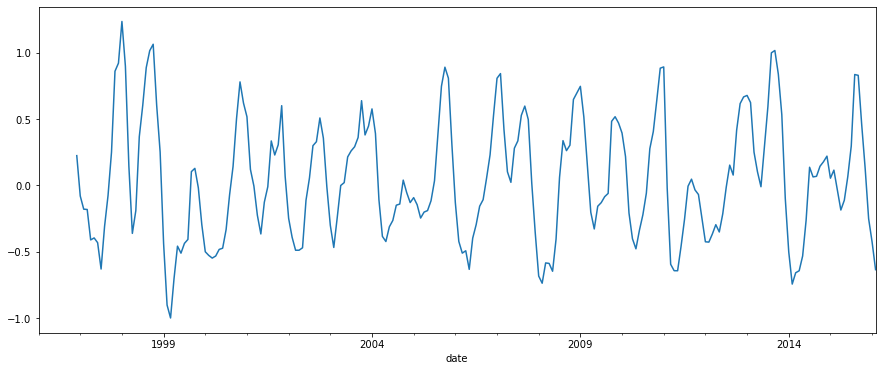

In [18]:
y_log_moving_avg_diff.plot()

In [19]:
y_log_moving_avg_diff.dropna(inplace=True)
dftest2=adfuller(y_log_moving_avg_diff)
dftest2

(-6.292432533609134,
 3.572145938128572e-08,
 15,
 215,
 {'1%': -3.461136478222043,
  '5%': -2.875078880098608,
  '10%': -2.5739861168199027},
 -128.35618756960065)

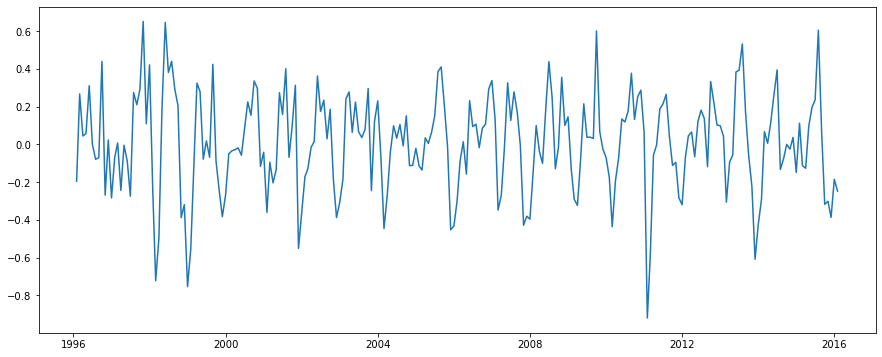

In [20]:
#eliminate trend & seasonality

# Differencing
#____________________________
# One of the most common methods of dealing with both trend and seasonality is differencing.
# In this technique, 
# we take the difference of the observation at a particular instant with 
# that at the previous instant. This mostly works well in improving stationarity. 
# First order differencing can be done in Pandas as:
# ts_log.shift : will get you the LAG 

y_log_diff = y_log - y_log.shift()
plt.plot(y_log_diff)

In [21]:
y_log_diff.dropna(inplace=True)
dftest3=adfuller(y_log_diff)
dftest3

(-10.52301932867006,
 9.573938394419022e-19,
 5,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 -67.86626754056397)

In [22]:
#common method - ARIMA (Autoregressive integrated Moving Average)
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(y, nlags=12)
lag_pacf = pacf(y,nlags=12, method='ols')

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

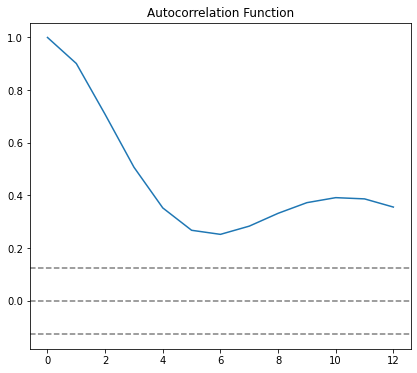

In [23]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

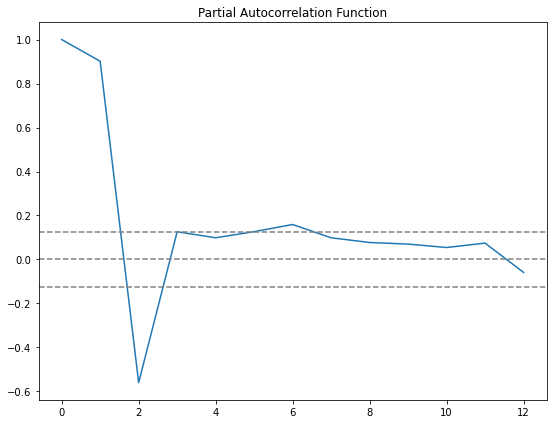

In [24]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')

plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')

plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')

plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [54]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 

p_values = [0, 1, 2]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(y.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1044.702
ARIMA(0, 0, 1) RMSE=602.022
ARIMA(0, 0, 2) RMSE=460.643
ARIMA(0, 1, 0) RMSE=443.455
ARIMA(0, 1, 1) RMSE=382.543
ARIMA(0, 1, 2) RMSE=385.686
ARIMA(0, 2, 0) RMSE=446.132
ARIMA(0, 2, 1) RMSE=479.425
ARIMA(0, 2, 2) RMSE=383.411
ARIMA(1, 0, 0) RMSE=446.179
ARIMA(1, 0, 1) RMSE=378.885
ARIMA(1, 0, 2) RMSE=375.081
ARIMA(1, 1, 0) RMSE=389.679
ARIMA(1, 1, 1) RMSE=384.232
ARIMA(1, 1, 2) RMSE=373.526
ARIMA(1, 2, 0) RMSE=460.058
ARIMA(1, 2, 1) RMSE=390.649
ARIMA(1, 2, 2) RMSE=385.337
ARIMA(2, 0, 0) RMSE=374.164
ARIMA(2, 0, 1) RMSE=373.382
ARIMA(2, 0, 2) RMSE=377.465
ARIMA(2, 1, 0) RMSE=381.612
ARIMA(2, 1, 1) RMSE=353.129
ARIMA(2, 1, 2) RMSE=356.726
ARIMA(2, 2, 0) RMSE=455.307
ARIMA(2, 2, 1) RMSE=382.709
ARIMA(2, 2, 2) RMSE=371.489
Best ARIMA(2, 1, 1) RMSE=353.129


# ARIMA model

In [41]:
#We need to load the ARIMA model first:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(y, order=(1, 0, 2)) 

In [42]:
results = model.fit() 

results.fittedvalues

date
1996-01-01     761.405024
1996-02-01     275.901468
1996-03-01     246.470775
1996-04-01     342.269358
1996-05-01     310.764005
                 ...     
2015-10-01    3442.887086
2015-11-01    1886.902969
2015-12-01    1773.950682
2016-01-01    1099.375525
2016-02-01    1053.772303
Freq: MS, Length: 242, dtype: float64

In [43]:
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:               priceMod   No. Observations:                  242
Model:                     ARMA(1, 2)   Log Likelihood               -1666.555
Method:                       css-mle   S.D. of innovations            235.725
Date:                Mon, 22 Mar 2021   AIC                           3343.110
Time:                        23:38:01   BIC                           3360.555
Sample:                    01-01-1996   HQIC                          3350.137
                         - 02-01-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            761.4050    125.933      6.046      0.000     514.580    1008.230
ar.L1.priceMod     0.7701      0.047     16.273      0.000       0.677       0.863
ma.L1.priceMod     0.6719      0.068

In [44]:
results.forecast

<bound method ARMAResults.forecast of <statsmodels.tsa.arima_model.ARMAResults object at 0x00000184EFD097C0>>

In [45]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

date
1996-01-01     761.405024
1996-02-01     275.901468
1996-03-01     246.470775
1996-04-01     342.269358
1996-05-01     310.764005
                 ...     
2015-10-01    3442.887086
2015-11-01    1886.902969
2015-12-01    1773.950682
2016-01-01    1099.375525
2016-02-01    1053.772303
Freq: MS, Length: 242, dtype: float64


In [46]:
comp_forecast = pd.DataFrame(y)

In [47]:
comp_forecast['Prediction'] = predictions_ARIMA_diff

In [48]:
comp_forecast

,priceMod,Prediction
date,,
1996-01-01,226.000000,761.405024
1996-02-01,186.000000,275.901468
1996-03-01,243.000000,246.470775
1996-04-01,254.000000,342.269358
1996-05-01,269.000000,310.764005
...,...,...
2015-10-01,2838.788889,3442.887086
2015-11-01,2101.056180,1886.902969
2015-12-01,1427.516129,1773.950682


In [49]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
1996-01-01     761.405024
1996-02-01    1037.306492
1996-03-01    1283.777267
1996-04-01    1626.046626
1996-05-01    1936.810630
Freq: MS, dtype: float64


In [50]:
predictions_ARIMA_log = pd.Series(y_log.iloc[0], index=y_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
1996-01-01     766.825559
1996-02-01    1042.727027
1996-03-01    1289.197802
1996-04-01    1631.467161
1996-05-01    1942.231165
Freq: MS, dtype: float64

In [51]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, predictions_ARIMA_diff)
print("mean_squared_error : ",mse)

mean_squared_error :  56607.612227357204


In [52]:
rmse = mean_squared_error(y, predictions_ARIMA_diff, squared=False)
print("root_mean_squared_error : ",rmse)

root_mean_squared_error :  237.92354281860634


Text(0.5, 1.0, 'RMSE: 237.9235')

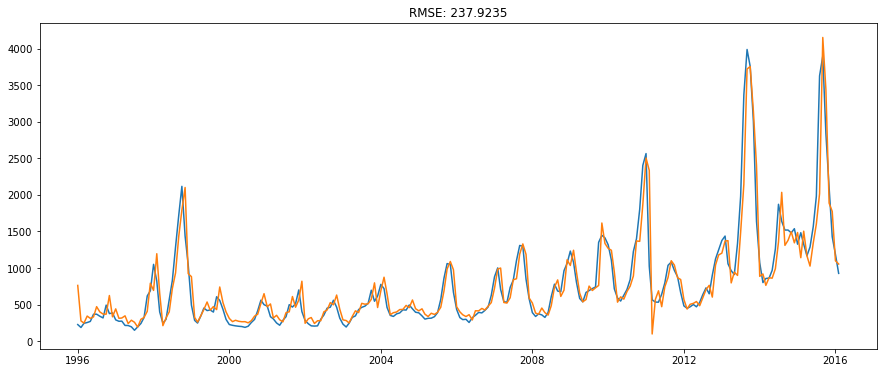

In [53]:
#predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(y)
plt.plot(predictions_ARIMA_diff)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_diff-y)**2)/len(y)))
#plt.title('MAPE: %.4f'% np.mean((predictions_ARIMA_diff-y)/y))

# Holt-Winters Method

In [142]:
train_size = int(len(y) * 0.80)
train_size

193

In [143]:
train = y[:train_size]
train

date
1996-01-01     226.000000
1996-02-01     186.000000
1996-03-01     243.000000
1996-04-01     254.000000
1996-05-01     269.000000
                 ...     
2011-09-01    1081.266667
2011-10-01     967.196429
2011-11-01     879.706897
2011-12-01     662.698413
2012-01-01     481.322581
Freq: MS, Name: priceMod, Length: 193, dtype: float64

<AxesSubplot:xlabel='date'>

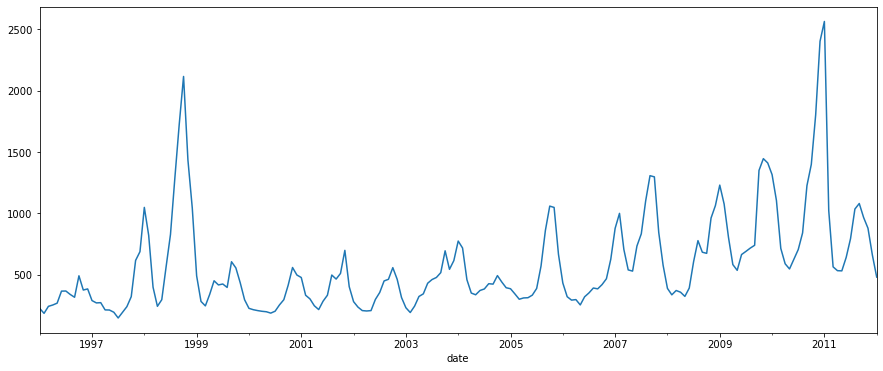

In [144]:
train.plot()

In [145]:
test = y[train_size:]
test

date
2012-02-01     448.288136
2012-03-01     469.070175
2012-04-01     500.650000
2012-05-01     468.915254
2012-06-01     529.120690
2012-07-01     634.622951
2012-08-01     727.633333
2012-09-01     646.838710
2012-10-01     902.067797
2012-11-01    1124.516667
2012-12-01    1246.377049
2013-01-01    1375.836066
2013-02-01    1436.793651
2013-03-01    1058.034483
2013-04-01     963.150000
2013-05-01     910.150000
2013-06-01    1335.730159
2013-07-01    1978.625000
2013-08-01    3368.327869
2013-09-01    3989.190476
2013-10-01    3758.269841
2013-11-01    3007.065574
2013-12-01    1636.888889
2014-01-01    1071.032787
2014-02-01     800.540984
2014-03-01     856.633333
2014-04-01     861.576271
2014-05-01     967.813559
2014-06-01    1261.290323
2014-07-01    1871.254237
2014-08-01    1638.500000
2014-09-01    1518.753846
2014-10-01    1519.046875
2014-11-01    1481.300000
2014-12-01    1537.458824
2015-01-01    1325.451220
2015-02-01    1482.588889
2015-03-01    1325.000000
2015-04

In [146]:
from statsmodels.tsa.api import ExponentialSmoothing

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

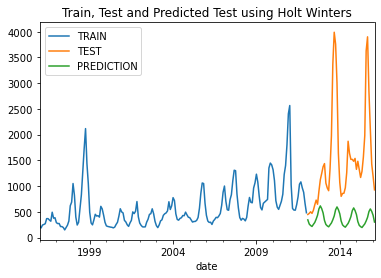

In [154]:
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(49)
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

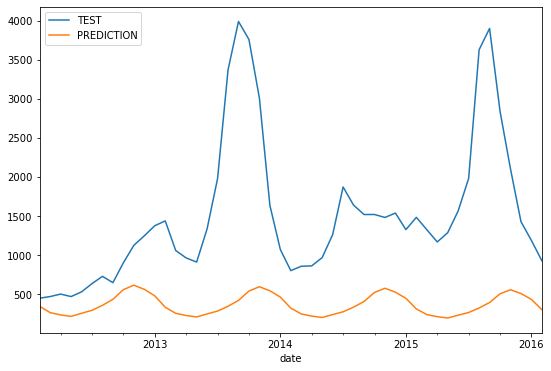

In [155]:
test.plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION');

In [156]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_predictions)}')

Mean Absolute Error = 1147.0974355314977
Mean Squared Error = 2098443.664090176
